In [1]:
#Importing major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from io import StringIO

In [2]:
#reading data from the source as a numpy array
data = np.genfromtxt("https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data",names=True)

In [3]:
#converting np array to pandas dataframe 
data_frame = pd.DataFrame(data)

In [4]:
#verfying the correctness of the dataframe
print(type(data_frame))
data_frame.shape

<class 'pandas.core.frame.DataFrame'>


(442, 11)

In [5]:
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    float64
 1   SEX     442 non-null    float64
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    float64
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    float64
 10  Y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [6]:
#printing to check the first and last few rows of the dataframe
data_frame.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [7]:
data_frame.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0
441,36.0,1.0,19.6,71.00,250.0,133.2,97.0,3.00,4.5951,92.0,57.0


In [8]:
#displaying the summary of the dataset
data_frame.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [9]:
#data_frame.agg(
#    {"S1": ["min", "max", "median", "skew"],
#     "S3": ["min", "max", "median", "skew"],
#     "S4": ["min", "max", "median", "skew"]}
#    )

In [10]:
#finding null/missing values in the dataframe
print(data_frame.isnull().sum())

AGE    0
SEX    0
BMI    0
BP     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
Y      0
dtype: int64


In [11]:
#finding if there are any duplicate rows in the dataset
duplicate_rows_df = data_frame[data_frame.duplicated()]
print("No of duplicate rows are:", duplicate_rows_df.shape)

No of duplicate rows are: (0, 11)


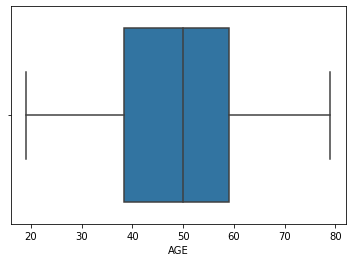

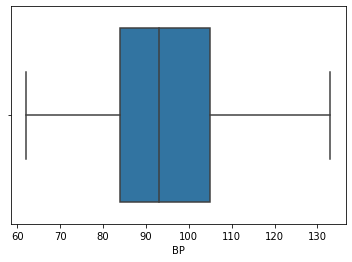

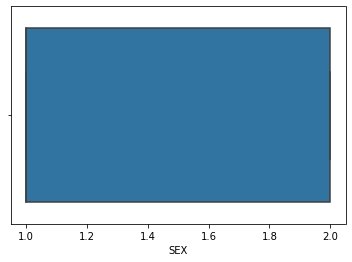

In [12]:
#Finding outliers in age & BP & sex column
sns.boxplot(x=data_frame['AGE'])
mp.show()
sns.boxplot(x=data_frame['BP'])
mp.show()
sns.boxplot(x=data_frame['SEX'])
mp.show()
#no outliers

<AxesSubplot:xlabel='BMI'>

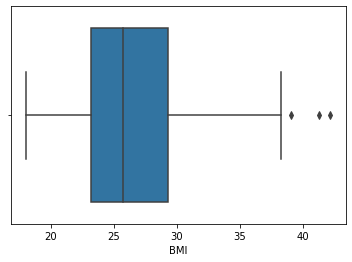

In [13]:
#Finding outliers in BMI column
sns.boxplot(x=data_frame['BMI'])

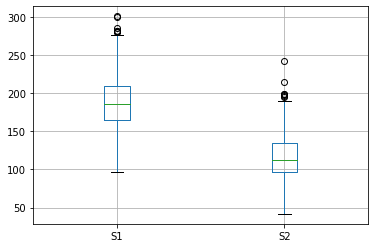

In [14]:
#Listing the outliers in Serum columns - combined on the basis of range of values in each column
boxplot = data_frame.boxplot(column=['S1','S2'])

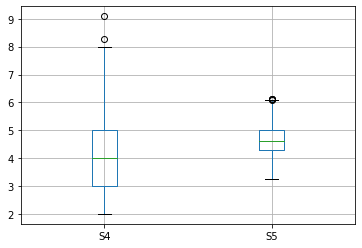

In [15]:
boxplot = data_frame.boxplot(column=['S4','S5'])

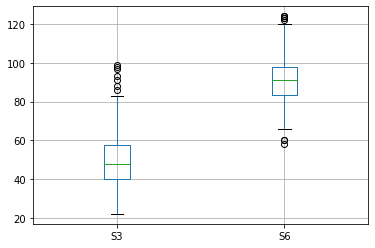

In [16]:
boxplot = data_frame.boxplot(column=['S3','S6'])

<AxesSubplot:title={'center':'Y'}, xlabel='SEX'>

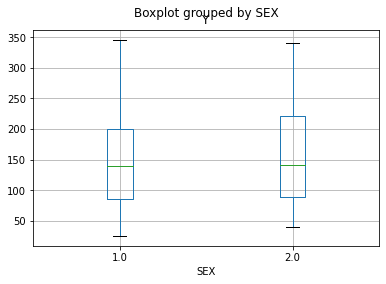

In [17]:
#categorical data and the distribution of disease progression Y with it
data_frame.boxplot(column=['Y'],by='SEX')

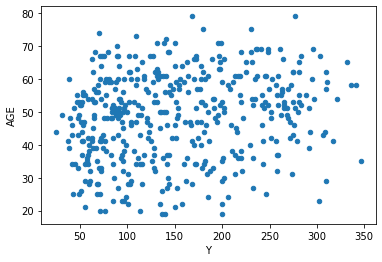

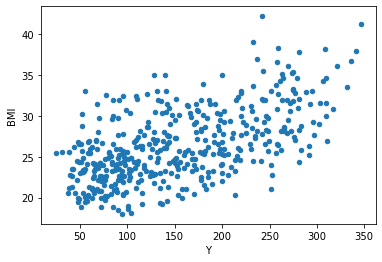

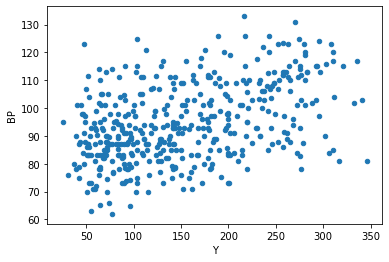

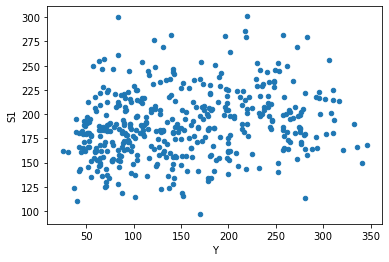

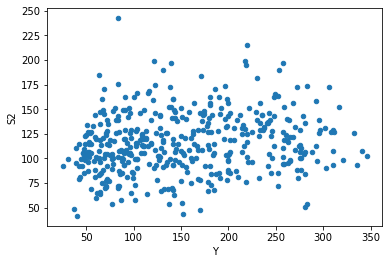

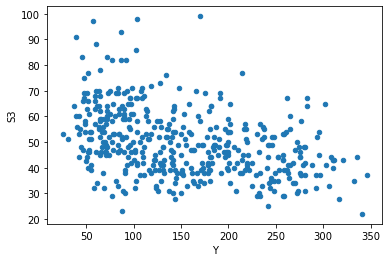

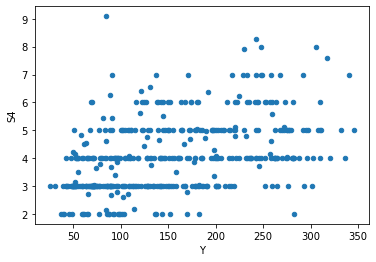

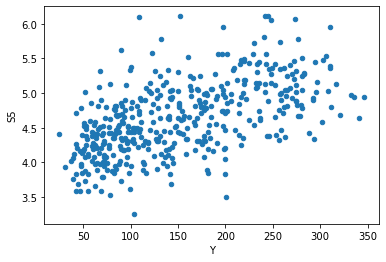

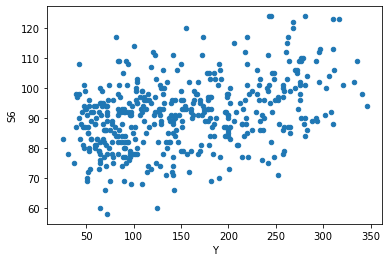

In [18]:
#finding coorelation of each variable against Y
sp1 = data_frame.plot.scatter(x='Y', y='AGE', marker='o')
sp2 = data_frame.plot.scatter(x='Y', y='BMI', marker='o')
sp3 = data_frame.plot.scatter(x='Y', y='BP', marker='o')
sp4 = data_frame.plot.scatter(x='Y', y='S1', marker='o')
sp5 = data_frame.plot.scatter(x='Y', y='S2', marker='o')
sp6 = data_frame.plot.scatter(x='Y', y='S3', marker='o')
sp7 = data_frame.plot.scatter(x='Y', y='S4', marker='o')
sp8 = data_frame.plot.scatter(x='Y', y='S5', marker='o')
sp9 = data_frame.plot.scatter(x='Y', y='S6', marker='o')

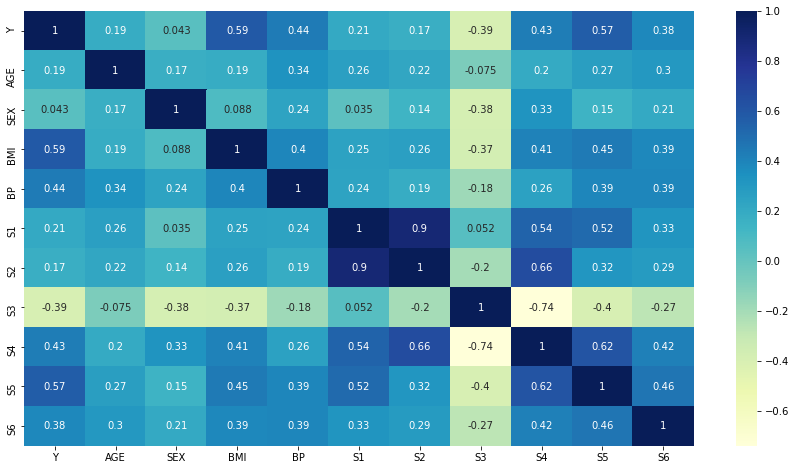

In [19]:
#plotting heatmap to show correlation 
mp.figure(figsize = (15,8))
df1 = data_frame[['Y','AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]
c1 = df1.corr()
ax = sns.heatmap(c1,cmap="YlGnBu",annot=True)

<AxesSubplot:>

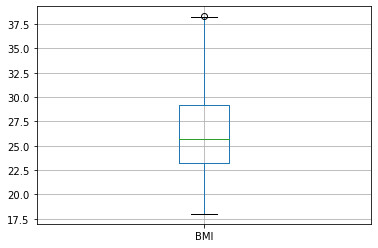

In [19]:
#replace outliers - outliers exist in columns - BMI,S1,S2,S3,S4,S5,S6
#replacing the outlier in BMI with mean
median_bmi = data_frame['BMI'].median()

#finding out interquartile range
percent25 = data_frame['BMI'].quantile(0.25)
percent75 = data_frame['BMI'].quantile(0.75)


iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['BMI']:
        data_frame.loc[data_frame[x] >= upper_limit,x] = median_bmi
        data_frame.loc[data_frame[x] <= lower_limit,x] = median_bmi

#boxplot after removing the outlier
data_frame.boxplot(column=['BMI'])

<AxesSubplot:>

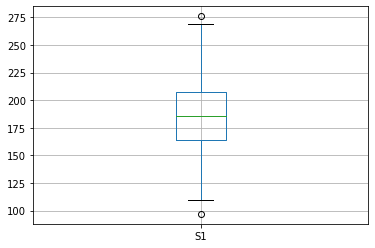

In [21]:
#replacing the outlier in S1 with mean
median_S1 = data_frame['S1'].median()

#finding out interquartile range
percent25 = data_frame['S1'].quantile(0.25)
#percent25 = np.percentile(data_frame['BMI'],25)
#percent75 = np.percentile(data_frame['BMI'],75)
#percent75 = np.percentile(mean_bmi,75)
percent75 = data_frame['S1'].quantile(0.75)


iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S1']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S1
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S1

#boxplot after removing the outlier
data_frame.boxplot(column=['S1'])

<AxesSubplot:>

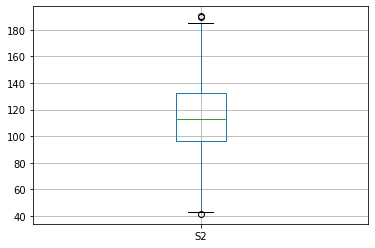

In [22]:
#replacing the outlier in S2 with mean
median_S2 = data_frame['S2'].median()

#finding out interquartile range
percent25 = data_frame['S2'].quantile(0.25)
#percent25 = np.percentile(data_frame['BMI'],25)
#percent75 = np.percentile(data_frame['BMI'],75)
#percent75 = np.percentile(mean_bmi,75)
percent75 = data_frame['S2'].quantile(0.75)


iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S2']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S2
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S2

#boxplot after removing the outlier
data_frame.boxplot(column=['S2'])

<AxesSubplot:>

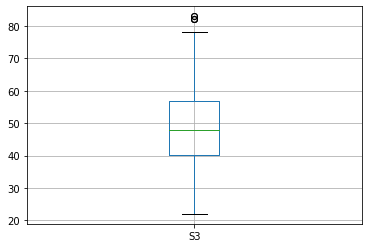

In [23]:
#replacing the outlier in S3 with mean
median_S3 = data_frame['S3'].median()

#finding out interquartile range
percent25 = data_frame['S3'].quantile(0.25)
percent75 = data_frame['S3'].quantile(0.75)

iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S3']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S3
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S3

#boxplot after removing the outlier
data_frame.boxplot(column=['S3'])

<AxesSubplot:>

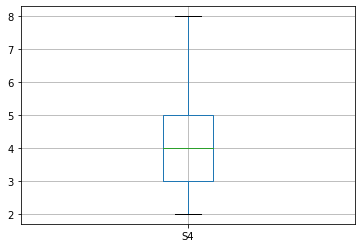

In [24]:
#replacing the outlier in S4 with mean
median_S4 = data_frame['S4'].median()

#finding out interquartile range
percent25 = data_frame['S4'].quantile(0.25)
percent75 = data_frame['S4'].quantile(0.75)

iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S4']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S4
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S4

#boxplot after removing the outlier
data_frame.boxplot(column=['S4'])

<AxesSubplot:>

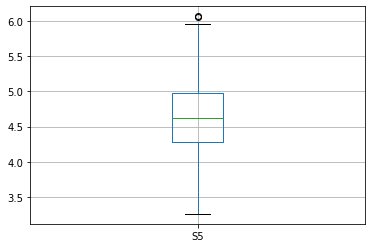

In [25]:
#replacing the outlier in S5 with mean
median_S5 = data_frame['S5'].median()

#finding out interquartile range
percent25 = data_frame['S5'].quantile(0.25)
percent75 = data_frame['S5'].quantile(0.75)

iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S5']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S5
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S5

#boxplot after removing the outlier
data_frame.boxplot(column=['S5'])

<AxesSubplot:>

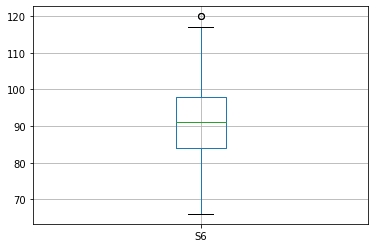

In [26]:
#replacing the outlier in S6 with mean
median_S6 = data_frame['S6'].median()

#finding out interquartile range
percent25 = data_frame['S6'].quantile(0.25)
percent75 = data_frame['S6'].quantile(0.75)

iqr = percent75 - percent25
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

for x in ['S6']:
        data_frame.loc[data_frame[x] > upper_limit,x] = median_S6
        data_frame.loc[data_frame[x] < lower_limit,x] = median_S6

#boxplot after removing the outlier
data_frame.boxplot(column=['S6'])

In [27]:
#normalizing data
from sklearn import preprocessing
names = data_frame.columns
d = preprocessing.normalize(data_frame, axis=0)
scaled_df = pd.DataFrame(d,columns=names)
scaled_df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.055843,0.061343,0.057370,0.050226,0.039299,0.037774,0.035832,0.044896,0.049655,0.045155,0.042122
1,0.045432,0.030671,0.038604,0.043264,0.045807,0.041827,0.066006,0.033672,0.039765,0.035813,0.020922
2,0.068148,0.061343,0.054511,0.046247,0.039049,0.037936,0.038660,0.044896,0.047745,0.044117,0.039333
3,0.022716,0.030671,0.045217,0.041772,0.049562,0.053257,0.037718,0.056120,0.049967,0.046193,0.057465
4,0.047325,0.030671,0.041106,0.050226,0.048060,0.050825,0.049033,0.044896,0.043839,0.041522,0.037659


<AxesSubplot:>

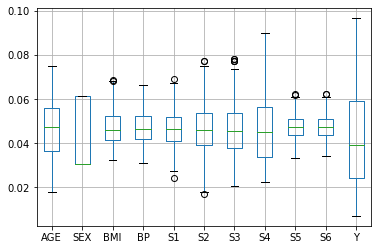

In [28]:
#drawing boxplots for normalized data
scaled_df.boxplot()

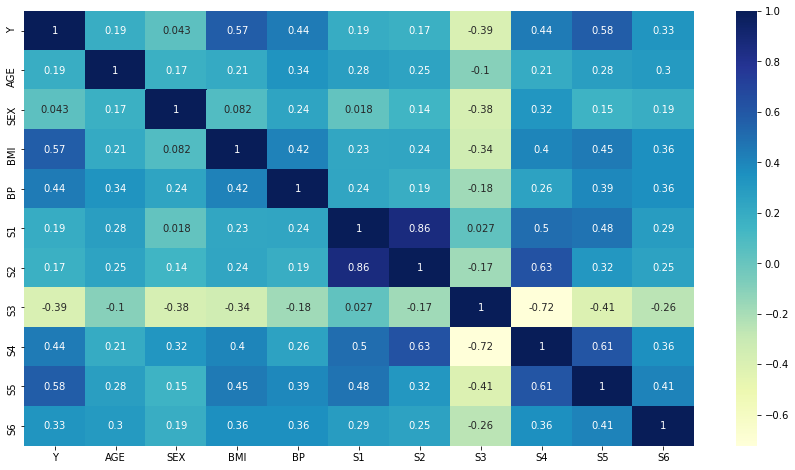

In [29]:
#seeing the corelation matrix after removing the outliers
mp.figure(figsize = (15,8))
df2 = scaled_df[['Y','AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]
c2 = df2.corr()
ax = sns.heatmap(c2,cmap="YlGnBu",annot=True)

In [30]:
#Limitations/issues with the dataset
#Less data and variables available
#No information about the columns available